<a href="https://colab.research.google.com/github/ash11sh/face-makeup.PyTorch/blob/master/face_makeup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# git clone

In [0]:
!git clone https://github.com/ash11sh/fm.PyTorch.git

In [0]:
cd fm.PyTorch/

In [0]:
!pip install -r  requirements.txt

# potrait

In [0]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import argparse
from PIL import Image
from PIL.ExifTags import TAGS
from utils import Preprocess
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from test import evaluate
from google.colab.patches import cv2_imshow
from makeup import exif_remover,resizer,sharpen,hair
import requests


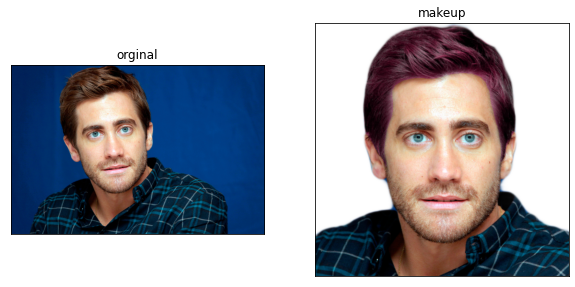

In [11]:

table = {'hair': 17, 'upper_lip': 12, 'lower_lip': 13 }
cp = 'cp/79999_iter.pth'

img_url = 'https://f.vividscreen.info/soft/1da470059881e957e4c715e425ca9bb1/Jake-Gyllenhaal-2880x1920.jpg' #@param {type: "string"} 

filename = img_url.split('/')[-1]
r = requests.get(img_url, allow_redirects=True)
open(filename, 'wb').write(r.content)


img_size = "512"  #@param [512,256]

img  =  cv2 . cvtColor ( cv2.imread (filename), cv2 . COLOR_BGR2RGB )
pre  =  Preprocess ()

# face alignment and segmentation
face_rgba  =  pre . process ( img )
if  face_rgba  is  not  None :
  # change background to white
  face_rgba  =  cv2 . resize ( face_rgba , (int(img_size),int(img_size )), interpolation = cv2 . INTER_AREA )
  face  =  face_rgba [:,:,: 3 ]. copy ()
  mask  =  face_rgba [:,:, 3 ]. copy () [:,:, np . newaxis ] / 255.
  face_white_bg  = ( face * mask  + ( 1 - mask ) * 255 ). astype ( np . uint8 )
  potrait = cv2.cvtColor (face_white_bg , cv2 . COLOR_RGB2BGR )
  cv2.imwrite('potrait.png',potrait)

parsing = evaluate(potrait, cp)
part = [table['hair']]
green = [25,250,32]
yellow = [30,252,249]
orange = [30,108,252]
burgundy = [32,0,128]
ruby =[95,17,224]
blonde = [123,201,227]


colors = ruby #@param ['green','yellow','orange','burgundy','ruby','blonde'] {type:"raw"}
image = hair(potrait, parsing, part, colors)
nrows,ncols = 1,2
fig, axs = plt.subplots(nrows,ncols, figsize=(10,10))
axs[0].imshow(img)
axs[0].set_title('orginal')
axs[0].set_xticks([]), axs[0].set_yticks([])
axs[1].imshow(cv2.cvtColor (image , cv2 . COLOR_BGR2RGB ))
axs[1].set_title('makeup')
axs[1].set_xticks([]), axs[1].set_yticks([])
plt.show()

